<a href="https://colab.research.google.com/github/jdug1981/proyecto_final/blob/main/PROYECTO_ORIGINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align=center><font size = 5>PROYECTO DE MACHINE LEARNING</font></h1>

---

## Problema - BANKING TELEMARKETING
<b>Valores de la vivienda en los suburbios de Boston</b>

<h5>La variable <b>medv</b> es la variable objetivo.</h5>

<b>Descripción de datos</b>

El data frame de TeleMarketing contiene 41188 filas y 21 columnas.

<b>Este data frame contiene las siguientes columnas:</b>

---

* <b>age : </b> Edad del cliente (variable numérica).

* <b>job : </b> Tipo de empleo del cliente (variable categórica), que puede incluir valores como "admin.", "blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student" y "technician", entre otros.

* <b>marital : </b> Estado civil del cliente (variable categórica), con categorías como "divorced", "married" y "single".

* <b>education : </b> Nivel educativo del cliente (variable categórica), que puede ser "basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", "professional.course", "university.degree" o "unknown".

* <b>default : </b>Indicador de crédito por defecto (variable categórica), con categorías "no" y "yes".

* <b>housing : </b>Indicador de préstamo hipotecario (variable categórica), con categorías "no" y "yes".

* <b>loan : </b> Indicador de préstamo personal (variable categórica), con categorías "no" y "yes".

* <b>contact : </b>Tipo de comunicación establecido con el cliente (variable categórica), que puede ser "cellular" o "telephone".

* <b>month : </b>Mes del año en el que se realizó el último contacto (variable categórica), con valores como "jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov" y "dec".

* <b>day_of_week : </b>Día de la semana en el que se realizó el último contacto (variable categórica), con categorías "mon", "tue", "wed", "thu" y "fri".

* <b>duration : </b>Duración del último contacto realizado en segundos (variable numérica).

* <b>campaign : </b> Número de contactos realizados durante esta campaña para este cliente (variable numérica).

* <b>pdays : </b>Número de días transcurridos desde el último contacto de una campaña anterior (variable numérica). Un valor de 999 indica que el cliente no fue contactado previamente.

* <b>previous : </b>Número de contactos realizados antes de esta campaña para este cliente (variable numérica).

* <b>poutcome : </b>Resultado de la campaña de marketing anterior (variable categórica), con categorías "failure", "nonexistent" y "success".

* <b>emp.var.rate : </b>Tasa de variación del empleo (variable numérica).

* <b>cons.price.idx : </b>Índice de precios al consumidor (variable numérica).

* <b>cons.conf.idx : </b>Índice de confianza del consumidor (variable numérica).

* <b>euribor3m : </b>Tasa de interés del Euribor a 3 meses (variable numérica).

* <b>nr.employed : </b>Número de empleados (variable numérica).

* <b>y : </b>Variable objetivo (variable categórica), que indica si el cliente se suscribió ("yes") o no ("no") a un producto o servicio.

---

## Contexto

Una institución financiera no bancaria (NBFI) o una compañía financiera no bancaria (NBFC) es una institución financiera que no tiene una licencia bancaria completa o no está supervisada por una agencia reguladora bancaria nacional o internacional. NBFC facilita los servicios financieros relacionados con los bancos, como inversión, agrupación de riesgos, ahorros contractuales y corretaje de mercado.

Una NBFI está luchando por marcar ganancias debido a un aumento en los incumplimientos en la categoría de préstamos para vehículos. La empresa tiene como objetivo determinar la capacidad de pago del préstamo del cliente y comprender la importancia relativa de cada parámetro que contribuye a la capacidad del prestatario para pagar el préstamo.

<b>Meta:</b>

El objetivo del problema es predecir si un cliente no cumplirá con el pago del préstamo del vehículo o no.

## 0.- Importar Librerías
Primero, importemos algunos módulos comunes.

In [47]:
# Definición de Librerias
!pip install pandas_profiling
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import ydata_profiling
import matplotlib.pyplot as plt
import os

## 1.- Leyendo y Explorando data

In [48]:
mainpath = "BankMarketing.csv"
data = pd.read_csv(mainpath,sep=";")

In [49]:
# Contar los datos:
print(data.shape)
# Validar la data de forma general
data.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Identificar los principales atributos:

In [50]:
# Identificamos los tipos de variables:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [51]:
# Iniciamos con modificar la variable objetivo para los futuros trabajos a realizar:
# Debemos de cambiar la variable objetivo "no" por "0":
print(data['y'].unique())
data['y'] = data['y'].str.replace('no','0', regex=False)
print(data['y'].unique())

['no' 'yes']
['0' 'yes']


In [52]:
# Debemos de cambiar la variable objetivo "si" por "1".
print(data['y'].unique())
data['y'] = data['y'].str.replace('yes','1', regex=False)
print(data['y'].unique())

['0' 'yes']
['0' '1']


In [53]:
# Ahora procedemos con modificar el tipo de campo (de char a numeric)
data['y']=data['y'].astype(str).astype(int)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [55]:
# Identificar las variables categóricas utilizando el atributo dtypes
variables_categoricas = data.select_dtypes(include=['object']).columns.tolist()
variables_categoricas

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [56]:
# Identificar las variables numéricas utilizando el atributo dtypes
variables_numericas = data.select_dtypes(include=['number']).columns.tolist()
#variables_numericas.remove(target)
variables_numericas

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [57]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


<Axes: xlabel='y', ylabel='count'>

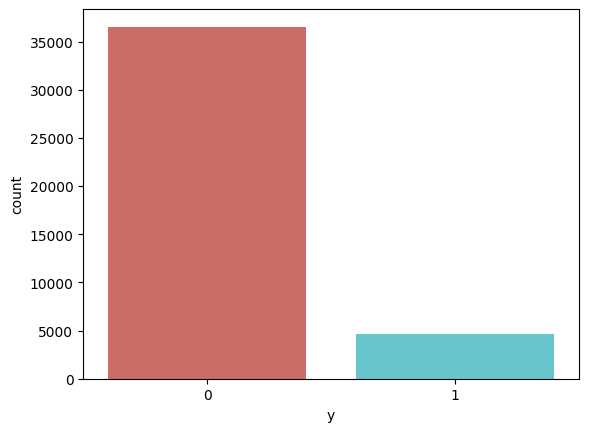

In [58]:
# Analizando el target
sns.countplot(x='y', data = data, palette = 'hls')

In [59]:
data.y.mean()

0.11265417111780131

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [61]:
#Exploración de variables categóricas
# Con este análisis detectamos las relaciones que puede tener c/u de las variables vs la variable objetivo.
data.groupby('marital').agg({'y': 'mean'})
# En resumen, visualizamos que las personas solteras poseen un 14%
# que dieron la conformidad para brindarles el producto via telefónica.

,y
marital,
divorced,0.103209
married,0.101573
single,0.140041
unknown,0.150000


In [62]:
# Ahora veamos con la variable "education" para ver las probabilidades que poseen:
data.groupby('education').agg({'y': 'mean'})
# Al ejecutar este análisis, se visualiza que los analfabetos son las personas que
# mas han estado interesadas en el producto.

,y
education,
basic.4y,0.102490
basic.6y,0.082024
basic.9y,0.078246
high.school,0.108355
illiterate,0.222222
professional.course,0.113485
university.degree,0.137245
unknown,0.145003


In [63]:
 # Vamos a describir la información.
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


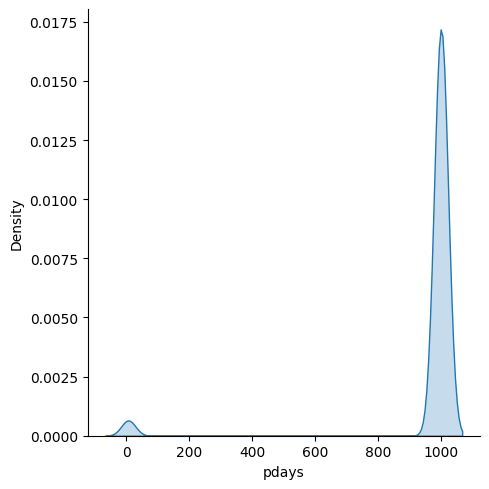

In [64]:
# Gráfico de Distribución de la variable objetivo
sns.displot(data['pdays'],kind="kde",fill=True)

<Figure size 400x600 with 0 Axes>

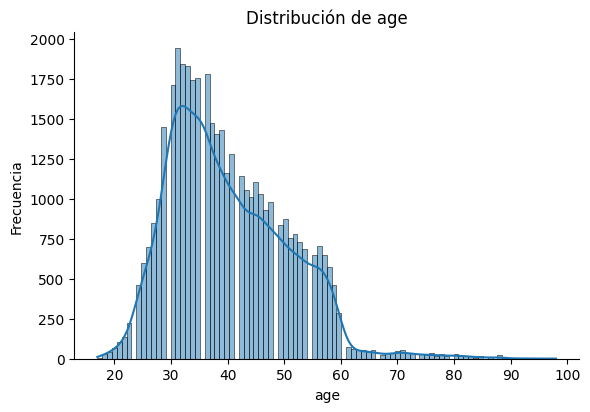

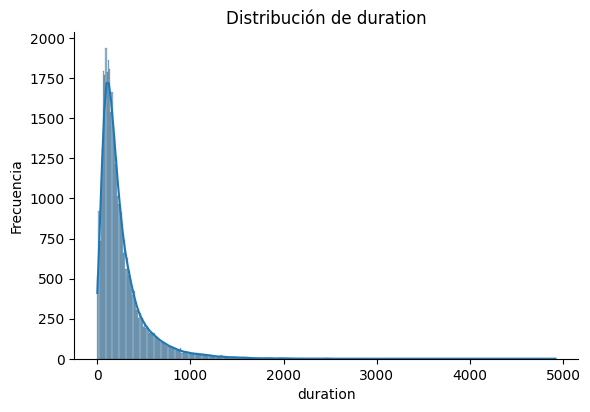

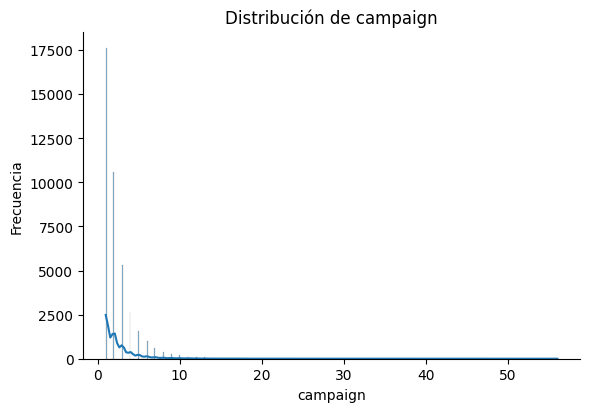

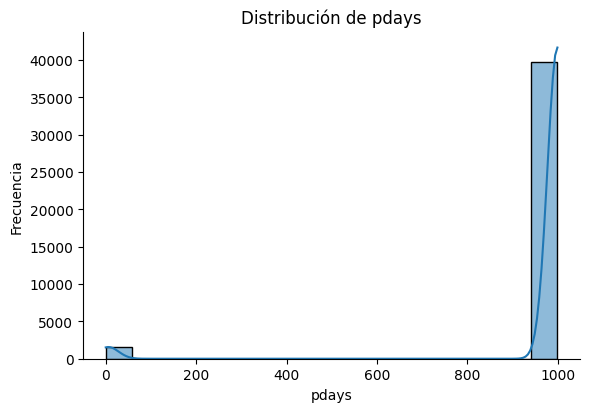

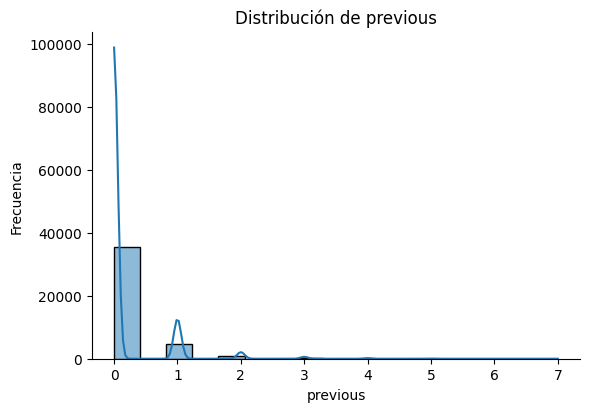

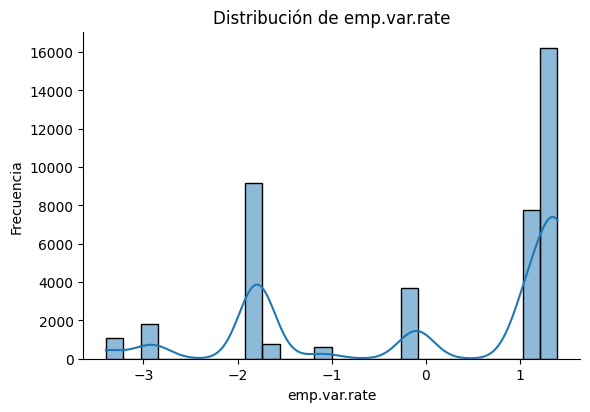

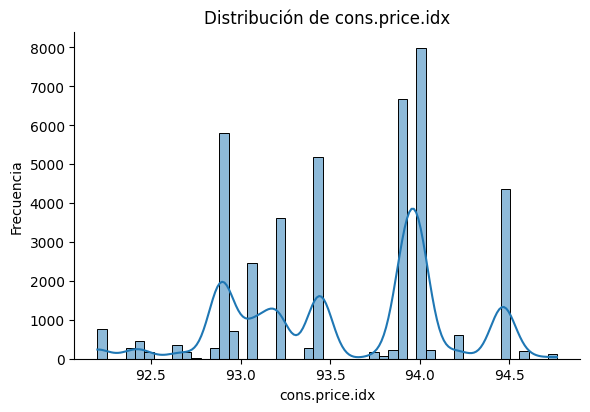

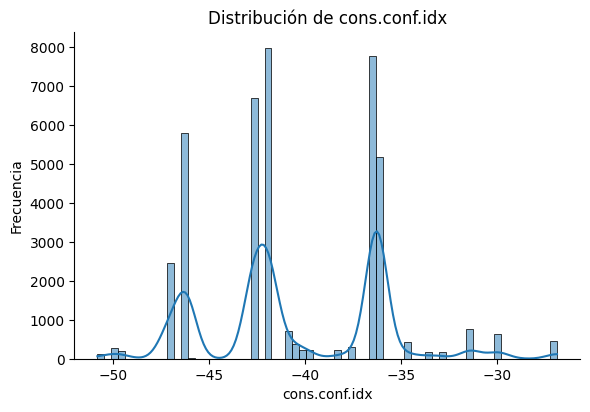

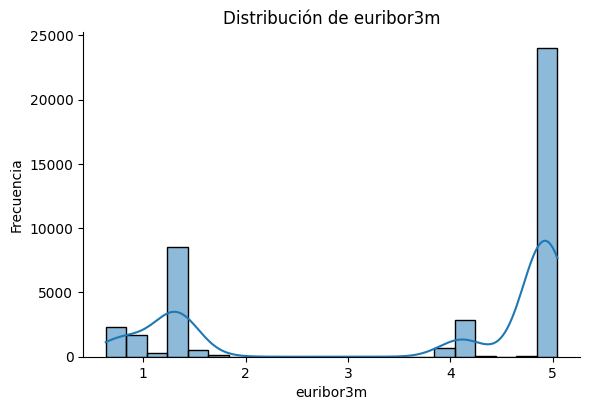

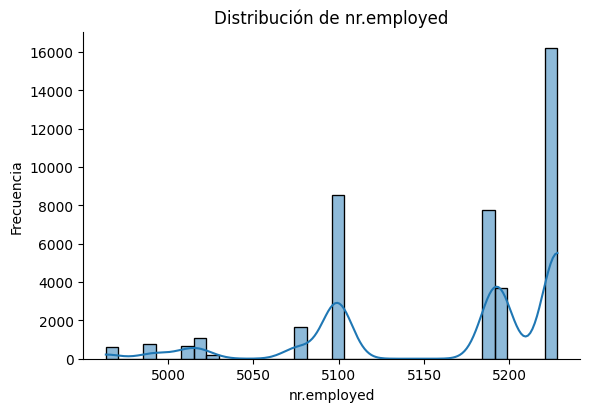

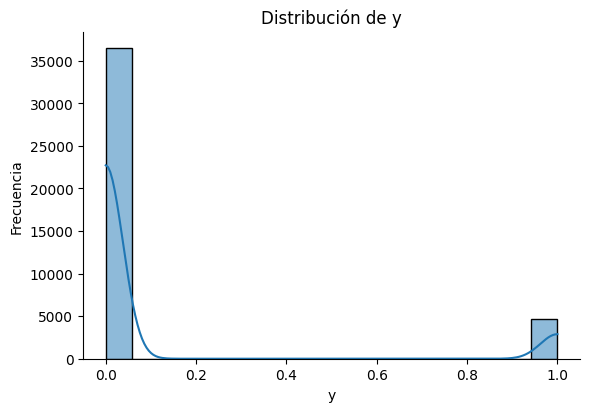

In [65]:
plt.figure(figsize=(4, 6))  # Tamaño del gráfico (ancho x alto en pulgadas)

for col in variables_numericas:
  # Gráfico de distribución
  sns.displot(data[col], height=4, aspect=1.5, kde=True)
  plt.title("Distribución de " + col, fontsize=12)  # Título del gráfico
  plt.xlabel(col, fontsize=10)  # Nombre del eje x
  plt.ylabel("Frecuencia", fontsize=10)  # Nombre del eje y
  plt.savefig(col + ".png")  # Guarda el gráfico como un archivo PNG
  #plt.close()
  plt.show()

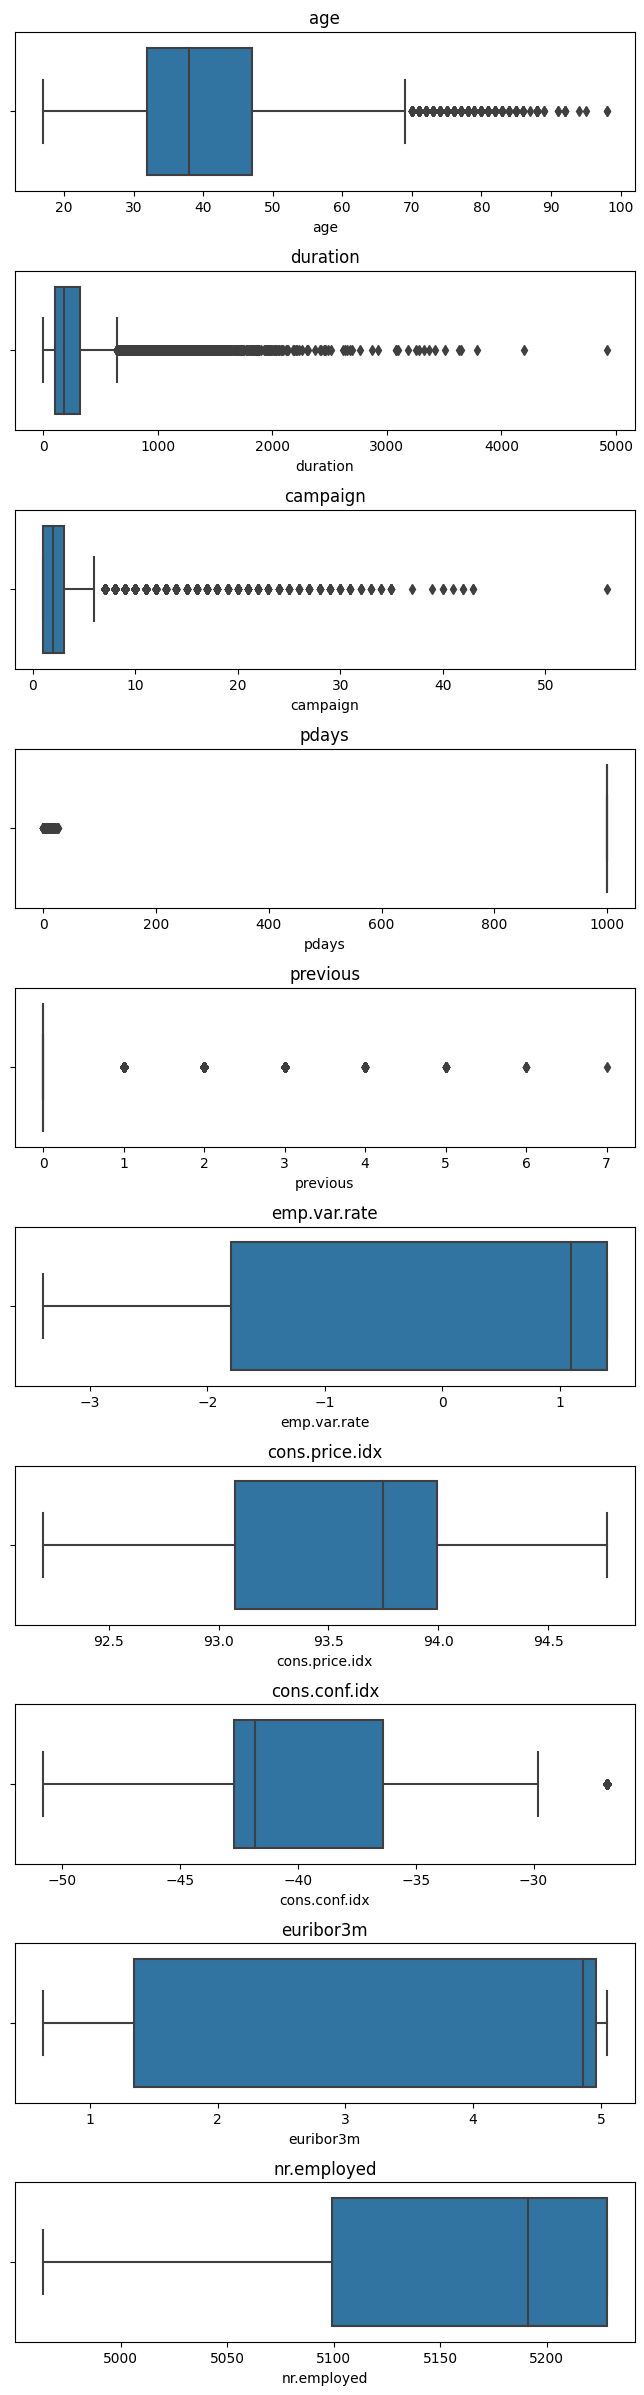

In [66]:
# Generar gráficas individuales boxplot pues las variables numéricas.
# están en rangos diferentes
cols_num = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

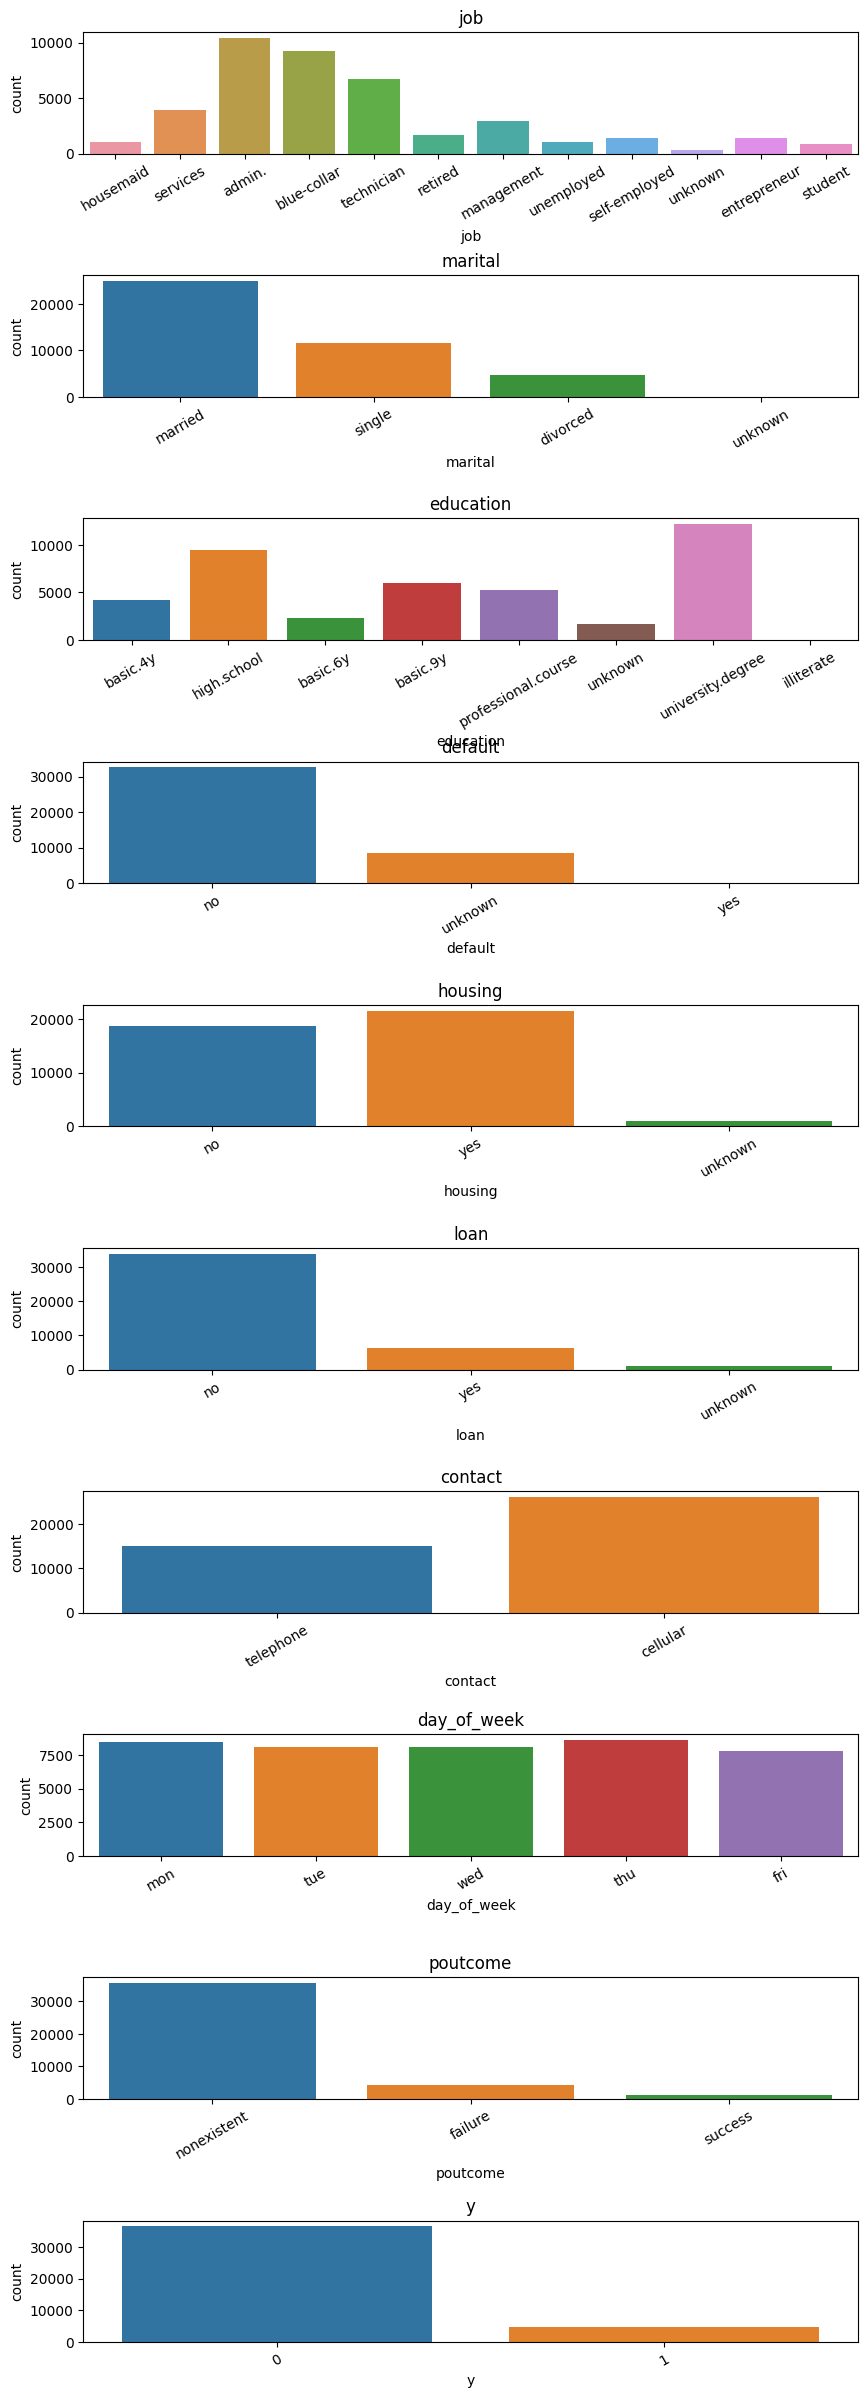

In [67]:
# Graficar los subniveles de cada variable categórica
cols_cat = ['job','marital','education','default','housing','loan','contact','day_of_week','poutcome','y']
fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

## 2.- Selección de Muestras

In [68]:
# Muestreo
from sklearn.model_selection import train_test_split

train, test = train_test_split(data,
                               stratify = data['y'],
                               train_size=0.7,
                               random_state=123)

In [69]:
print(f"Tamaño del total de datos: {len(data)}")
print(f"Tamaño de train: {len(train)}")
print(f"Tamaño de test: {len(test)}")

Tamaño del total de datos: 41188
Tamaño de train: 28831
Tamaño de test: 12357


## 3.- Pre-Selección de variables:

In [70]:
# Dando formato a nuestra tabla resumen
pdResume = train.describe().transpose()
# Ahora el nuevo index será el campo "feature"
pdResume.reset_index(inplace = True)
pdResume.rename(columns = {'index' : 'feature',
                           '25%' : 'Q1',
                           '50%' : 'median',
                           '75%' : 'Q3'}, inplace = True)
pdResume

,feature,count,mean,std,min,Q1,median,Q3,max
0,age,28831.0,40.082446,10.397002,17.000,32.000,38.000,47.000,98.000
1,duration,28831.0,258.310603,261.146406,0.000,102.000,180.000,319.000,4918.000
2,campaign,28831.0,2.565780,2.744723,1.000,1.000,2.000,3.000,43.000
3,pdays,28831.0,963.178107,185.180267,0.000,999.000,999.000,999.000,999.000
4,previous,28831.0,0.172696,0.490321,0.000,0.000,0.000,0.000,6.000
5,emp.var.rate,28831.0,0.073771,1.572636,-3.400,-1.800,1.100,1.400,1.400
6,cons.price.idx,28831.0,93.571642,0.579244,92.201,93.075,93.444,93.994,94.767
7,cons.conf.idx,28831.0,-40.523333,4.645103,-50.800,-42.700,-41.800,-36.400,-26.900
8,euribor3m,28831.0,3.613038,1.736393,0.634,1.344,4.857,4.961,5.045
9,nr.employed,28831.0,5166.786355,72.321387,4963.600,5099.100,5191.000,5228.100,5228.100


In [71]:
# Procedemos con crear la columna missig para ver el porcentaje de valores perdidos:
pdResume[['missing_rate']] = 1 - pdResume[['count']]/train.shape[0]
pdResume.sort_values(by = 'missing_rate', ascending = False, inplace = True)
pdResume

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate
0,age,28831.0,40.082446,10.397002,17.000,32.000,38.000,47.000,98.000,0.0
1,duration,28831.0,258.310603,261.146406,0.000,102.000,180.000,319.000,4918.000,0.0
2,campaign,28831.0,2.565780,2.744723,1.000,1.000,2.000,3.000,43.000,0.0
3,pdays,28831.0,963.178107,185.180267,0.000,999.000,999.000,999.000,999.000,0.0
4,previous,28831.0,0.172696,0.490321,0.000,0.000,0.000,0.000,6.000,0.0
5,emp.var.rate,28831.0,0.073771,1.572636,-3.400,-1.800,1.100,1.400,1.400,0.0
6,cons.price.idx,28831.0,93.571642,0.579244,92.201,93.075,93.444,93.994,94.767,0.0
7,cons.conf.idx,28831.0,-40.523333,4.645103,-50.800,-42.700,-41.800,-36.400,-26.900,0.0
8,euribor3m,28831.0,3.613038,1.736393,0.634,1.344,4.857,4.961,5.045,0.0
9,nr.employed,28831.0,5166.786355,72.321387,4963.600,5099.100,5191.000,5228.100,5228.100,0.0


In [72]:
# Se ejecuta este comando, pero en realidad como la data ya está trabajada o sin na, entonces no se elimina ningún registro
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [73]:
# Conteo de los niveles en las diferentes columnas categóricas:
# Como se verá en su ejecución, todas las variables categóricas poseen mas de 1 subnivel, por tal motivo no podremos a primera vista, eliminar alguna columna.
cols_cat = ['job','marital','education','default','housing','loan','contact','day_of_week','poutcome','y']
for col in cols_cat:
  print('Columna ', col, ': ' , data[col].nunique() ,  ' Subniveles')

Columna  job :  12  Subniveles
Columna  marital :  4  Subniveles
Columna  education :  8  Subniveles
Columna  default :  3  Subniveles
Columna  housing :  3  Subniveles
Columna  loan :  3  Subniveles
Columna  contact :  2  Subniveles
Columna  day_of_week :  5  Subniveles
Columna  poutcome :  3  Subniveles
Columna  y :  2  Subniveles


In [74]:

data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [75]:
# Hemos validado que hay filas repetidas...Se eliminarán 12 filas.
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (41188, 21)
Tamaño del set después de eliminar las filas repetidas: (41176, 21)


## 3.- Tratamiento de Variables

In [76]:
train['poutcome'].value_counts()

nonexistent    24861
failure         3020
success          950
Name: poutcome, dtype: int64

In [77]:
train['poutcome'].drop_duplicates()

12060    nonexistent
39788        failure
38750        success
Name: poutcome, dtype: object

In [78]:
# Tratamiento con One Hot Encoding

In [79]:
# Tratamiento con Target Encoding